**Objective** :To predict Click Through Rate for email campaigns

In [4]:
#Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn  import preprocessing

In [50]:
#Data Collection
pd.options.display.max_columns = 110
train = pd.read_csv('train_F3fUq2S.csv')
#display(train).head()
test = pd.read_csv('test_Bk2wfZ3.csv')
#display(test).head()

**Exploratory Data Analysis**



In [ ]:
#Data Preprocessing
#check the number of rows and columns in training set
train.info()
train.shape

Checking for missing values in Dataset

In [ ]:
#checking for nullvalues
train.isnull().sum()

No null values in training set

Converting Categorical data into numerical data









c:\Users\pv20v\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='times_of_day', ylabel='count'>

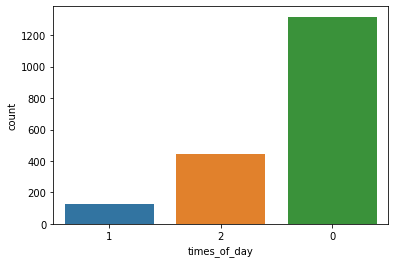

In [51]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()  
# Encode labels in column 'times_of_day'.
train['times_of_day']= label_encoder.fit_transform(train['times_of_day'])
train['times_of_day'].unique()
sns.countplot(train['times_of_day'],order=train['times_of_day'].value_counts().index[::-1])

Data Cleaning

In [10]:
# Checking for unique values of few columns
train['is_timer'].unique()

array([0], dtype=int64)

In [52]:
#drop the column 'is_timer
train.drop('is_timer',axis=1,inplace=True)

In [53]:
#Drop the column campaign id 
train.drop('campaign_id',axis=1,inplace=True)

In [10]:
#Checking for outliers in the feature 'is_price'
train['is_price'].unique()
train['is_price'].value_counts()

0        1875
5499        5
8000        2
5000        2
4999        1
1399        1
1000        1
14999       1
Name: is_price, dtype: int64

In [54]:
#Drop the column 'is_price'
train.drop('is_price',axis=1,inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sender              1888 non-null   int64  
 1   subject_len         1888 non-null   int64  
 2   body_len            1888 non-null   int64  
 3   mean_paragraph_len  1888 non-null   int64  
 4   day_of_week         1888 non-null   int64  
 5   is_weekend          1888 non-null   int64  
 6   times_of_day        1888 non-null   int32  
 7   category            1888 non-null   int64  
 8   product             1888 non-null   int64  
 9   no_of_CTA           1888 non-null   int64  
 10  mean_CTA_len        1888 non-null   int64  
 11  is_image            1888 non-null   int64  
 12  is_personalised     1888 non-null   int64  
 13  is_quote            1888 non-null   int64  
 14  is_emoticons        1888 non-null   int64  
 15  is_discount         1888 non-null   int64  
 16  is_urg

**Univariate Analysis**

In [55]:
#mean,median,standard deviation,skewness,kurtosis
#We define a function to implement Univariate Analysis.
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (5*size,3), dpi = 50)
  plt.subplot(121)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=False)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 10)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

In [56]:
#Assigning the train numerical features.
Numerical_features_train = train.select_dtypes(include= ['int64','float'])
Numerical_features_train.columns


Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote',
       'is_emoticons', 'is_discount', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

c:\Users\pv20v\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pv20v\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\pv20v\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

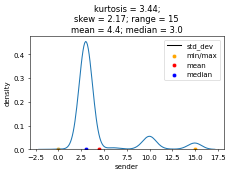

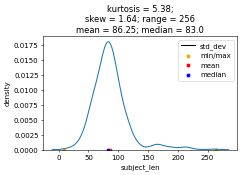

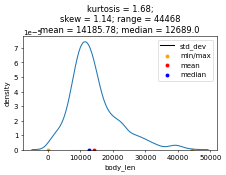

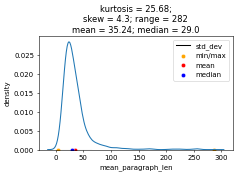

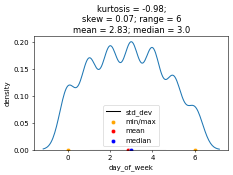

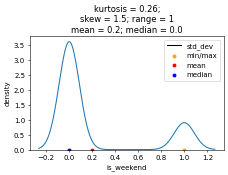

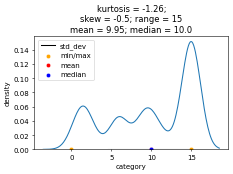

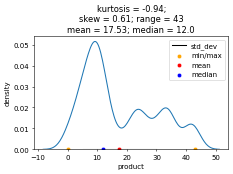

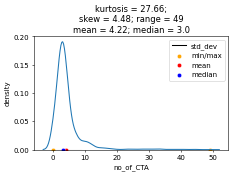

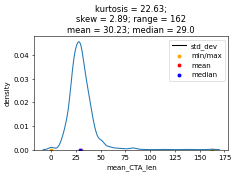

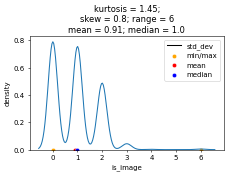

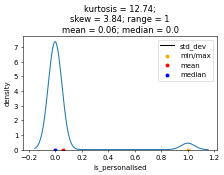

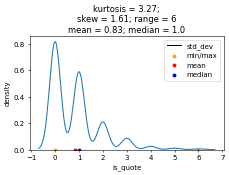

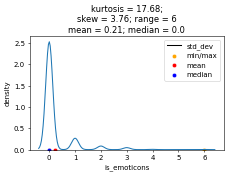

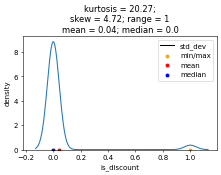

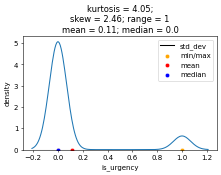

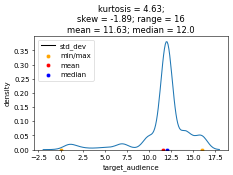

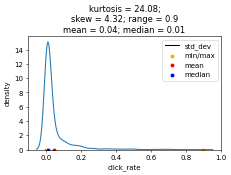

In [57]:
#Checking the distribution of all independent numerical variables.
for i in Numerical_features_train:
  UVA_KDE(train,[i])

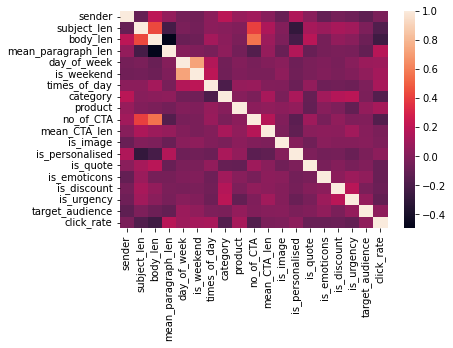

In [16]:
#Correlation Heatmap
sns.heatmap(train.corr())
plt.savefig("Plotting_Correlation_HeatMap.jpg")

Analysing Guassian Distributions:Removing the Outliers

In [58]:
Numerical_features_train.drop(['click_rate','is_urgency','is_weekend','is_personalised','is_emoticons','is_discount'],axis =1,inplace=True )

In [ ]:
Numerical_features_train.info()

In [60]:
#Outlier treatment of train dataset:

df1 = train.copy()

features1 = train.describe()

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = (Q3+(1.5*IQR))
    lower_limit = (Q1-(1.5*IQR))
    df1[i] = np.where(df1[i]> upper_limit, upper_limit,
                        np.where(df1[i]< lower_limit, lower_limit,
                          df1[i]))
    df1 = df1.reset_index(drop=True)
display(df1.head())

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience,click_rate
0,3.0,76.0,10439.0,39.0,5.0,0.0,2.0,6.0,26.0,3.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.080854
1,3.0,54.0,2570.0,68.5,5.0,0.0,1.0,2.0,11.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.080854
2,3.0,59.0,12801.0,16.0,5.0,0.0,2.0,2.0,11.0,3.0,23.0,1.0,0.0,1.0,0.0,0.0,0.0,12.0,0.002769
3,3.0,74.0,11037.0,30.0,4.0,0.0,0.0,15.0,9.0,4.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.010868
4,3.0,80.0,10011.0,27.0,5.0,0.0,2.0,6.0,26.0,3.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,0.080854


In [61]:
#test.drop('campaign_id', axis=1, inplace=True)
test['times_of_day']= label_encoder.fit_transform(test['times_of_day'])  
test.drop('is_timer', axis=1, inplace=True)
test.drop('is_price', axis=1, inplace=True)

In [62]:
Numerical_features_test = test.select_dtypes(include= ['int64','float'])
Numerical_features_test.columns
Numerical_features_test.drop(['is_urgency','is_weekend','is_personalised','is_emoticons','is_discount'],axis =1,inplace=True )

In [63]:
df2 = test.copy()

features2 = test.describe()

for i in features2:
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = (Q3+(1.5*IQR))
    lower_limit = (Q1-(1.5*IQR))
    df2[i] = np.where(df2[i]> upper_limit, upper_limit,
                        np.where(df2[i]< lower_limit, lower_limit,
                          df2[i]))
    df2 = df2.reset_index(drop=True)
display(df2.head())

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,mean_CTA_len,is_image,is_personalised,is_quote,is_emoticons,is_discount,is_urgency,target_audience
0,1889.0,3.0,61.0,12871.0,11.0,6.0,0.0,2.0,6.0,26.0,3.0,37.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0
1,1890.0,3.0,54.0,2569.0,67.5,5.0,0.0,1.0,2.0,11.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
2,1891.0,3.0,88.0,1473.0,67.5,4.0,0.0,0.0,2.0,11.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,12.0
3,1892.0,3.0,88.0,1473.0,67.5,3.0,0.0,0.0,2.0,11.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,0.0,12.0
4,1893.0,3.0,78.0,9020.0,29.0,3.0,0.0,2.0,6.0,26.0,2.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [64]:
train = df1.copy()
test= df2.copy()

Splitting Dataset

Train set includes the target variable' click_rate' and objective is to  predict the click_rate of an email campaign in the test set.

In [65]:
x_train = train.drop("click_rate",axis=1)
y_train = train["click_rate"]

In [ ]:
y_train.info()

In [74]:
x_test = test

In [75]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         762 non-null    float64
 1   sender              762 non-null    float64
 2   subject_len         762 non-null    float64
 3   body_len            762 non-null    float64
 4   mean_paragraph_len  762 non-null    float64
 5   day_of_week         762 non-null    float64
 6   is_weekend          762 non-null    float64
 7   times_of_day        762 non-null    float64
 8   category            762 non-null    float64
 9   product             762 non-null    float64
 10  no_of_CTA           762 non-null    float64
 11  mean_CTA_len        762 non-null    float64
 12  is_image            762 non-null    float64
 13  is_personalised     762 non-null    float64
 14  is_quote            762 non-null    float64
 15  is_emoticons        762 non-null    float64
 16  is_disco

Model Building and training


In [76]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

In [77]:
model1 = CatBoostRegressor()
model1.fit(x_train,y_train)
train_pred = model1.predict(x_train)
train_score_r2 = r2_score((train_pred), (y_train))

Learning rate set to 0.045268
0:	learn: 0.0273026	total: 2.87ms	remaining: 2.87s
1:	learn: 0.0269962	total: 5.29ms	remaining: 2.64s
2:	learn: 0.0266881	total: 7.31ms	remaining: 2.43s
3:	learn: 0.0264110	total: 9.51ms	remaining: 2.37s
4:	learn: 0.0261537	total: 12ms	remaining: 2.39s
5:	learn: 0.0259128	total: 14.5ms	remaining: 2.4s
6:	learn: 0.0256757	total: 17.4ms	remaining: 2.46s
7:	learn: 0.0254305	total: 20ms	remaining: 2.48s
8:	learn: 0.0252428	total: 22ms	remaining: 2.43s
9:	learn: 0.0250766	total: 24.5ms	remaining: 2.42s
10:	learn: 0.0248808	total: 27.1ms	remaining: 2.44s
11:	learn: 0.0246595	total: 31.2ms	remaining: 2.57s
12:	learn: 0.0244651	total: 33.6ms	remaining: 2.55s
13:	learn: 0.0242860	total: 36ms	remaining: 2.54s
14:	learn: 0.0240957	total: 38.5ms	remaining: 2.53s
15:	learn: 0.0239189	total: 41.1ms	remaining: 2.53s
16:	learn: 0.0237559	total: 44.6ms	remaining: 2.58s
17:	learn: 0.0235962	total: 47.5ms	remaining: 2.59s
18:	learn: 0.0234662	total: 49.9ms	remaining: 2.58s
1

In [78]:
test_pred = model1.predict(x_test)
print(test_pred)

[ 0.04211544  0.08320956  0.07794709  0.07885564  0.07154222  0.02912389
  0.01135876  0.00565392  0.01153071  0.02642045  0.01905636  0.01891359
  0.01007651  0.0208026   0.01192483  0.01033763  0.01033763  0.01688051
  0.0249285   0.03074868  0.01222131  0.01115523  0.00951667  0.00998225
  0.0082927   0.0063245   0.06395451  0.00650966  0.04366956  0.00605235
  0.00925855  0.02294229 -0.00246898  0.04941831  0.01787797  0.02307772
  0.00036787  0.0051225   0.00558176  0.01837209  0.01098139  0.01185105
  0.00810024  0.06239021  0.05451675  0.00753466  0.02646697  0.01316862
  0.02576921  0.0136703   0.02595252  0.01255202  0.00619093  0.01246807
  0.00757668  0.00446002  0.01794548  0.01597362  0.00590062  0.00240651
  0.06026469  0.00236463  0.01046666  0.0066813   0.01347148  0.01259993
  0.01094398  0.06505697  0.01189443  0.04827525  0.00739686  0.07843674
  0.00944838  0.00866097  0.05862033  0.04753161  0.00764721  0.04406863
  0.00558165  0.03572529  0.00727785  0.01019457  0

In [79]:
test_score_r2 = r2_score((test_pred), (y_train.head(762)))
print(test_score_r2)

-1.7110412663294294


In [80]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
reg = LinearRegression()
rfregressor = RandomForestRegressor(random_state=10)
gdb = GradientBoostingRegressor(random_state=10)
xgb = XGBRegressor(random_state=10)

In [82]:
import xgboost
xgregressor=xgboost.XGBRegressor()
classifier = xgboost.XGBRegressor()

In [83]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [84]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]


# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'booster':booster,
    'base_score':base_score
    }

In [85]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xgregressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'r2',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [86]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True, scoring='r2',
                   verbose=5)

In [87]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [88]:
regressor=xgboost.XGBRegressor(max_depth=2)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tr_x_train = scaler.fit_transform(x_train)

In [90]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [91]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [92]:
y_pred = regressor.predict(x_test)
print(y_pred)

ValueError: Feature shape mismatch, expected: 18, got 19

In [93]:
#Defining all these models
models = [
           ['LinearRegression: ',LinearRegression()],
           ['RandomForestRegressor: ',RandomForestRegressor()],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', XGBRegressor()] ,
           ['CatBoostRegressor:', CatBoostRegressor()]     
        ]

In [94]:
xgb  =XGBRegressor(max_depth=2)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Predicting Click Through Rate



In [95]:
y_pred = xgb.predict(x_test)
print (y_pred)

ValueError: Feature shape mismatch, expected: 18, got 19

Finding evaluation Metrics

In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3,include_bias=True )
X_poly = poly.fit_transform(x_train)
X_poly_test = poly.fit_transform(x_test)


In [97]:
#store all the metrics values in data frame
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 10
    curr_model_data["Name"] = name
    if(name!='PolynomialRegression: '):
      curr_model.fit(x_train,y_train)
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(x_train))
      curr_model_data["R2_Score_test"] = r2_score(y_pred,curr_model.predict(x_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(x_train)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_pred,curr_model.predict(x_test)))
      model_data.append(curr_model_data)
    else:
      curr_model.fit(X_poly,y_train)
      curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_poly))
      curr_model_data["R2_Score_test"] = r2_score(y_pred,curr_model.predict(X_poly_test))
      curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_poly)))
      curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_pred,curr_model.predict(X_poly_test)))
      model_data.append(curr_model_data)

c:\Users\pv20v\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- campaign_id

  warnings.warn(message, FutureWarning)


ValueError: X has 19 features, but LinearRegression is expecting 18 features as input.

In [73]:
metrics_df1 = pd.DataFrame(model_data)
metrics_df1


""


Creating Submission file with predictions

In [47]:
pred = pd.DataFrame(y_pred)
dataset = pd.concat([test["campaign_id"], pred], axis=1)
dataset.columns = ["campaign_id", "click_rate"]
dataset.to_csv(r'submission_file.csv', index=False)

KeyError: 'campaign_id'

In [ ]:
from google.colab import files
files.download("submission_file.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>